In [6]:
from cnocr import CnOcr

img_fp = '20201021700154.jpg'
# check available models on https://github.com/breezedeus/CnOCR/
ocr = CnOcr(det_model_name='ch_PP-OCRv4_det_server',rec_model_name='ch_PP-OCRv4_server')  
out = ocr.ocr(img_fp)

print(out)
# for the first time running the script, it will download the onnx of models from url
# you can specify rec_root and det_root, to determin where the onnx will be saved/ was saved
# Default `~/.cnocr`, that create location like `~/.cnocr/2.3/densenet_lite_136-gru`

/home/test/.cnocr /home/test/.cnstd
[{'text': '遠通電收股份有限公司', 'score': 0.94715226, 'position': array([[376,  10],
       [684,  12],
       [684,  45],
       [376,  42]], dtype=int32)}, {'text': '受人鞋記抓', 'score': 0.50329244, 'position': array([[828,  25],
       [961,  25],
       [961,  42],
       [828,  42]], dtype=int32)}, {'text': 'Far Eastem Electronic Toll Collection Co.,Ltd.', 'score': 0.9397331, 'position': array([[372,  40],
       [684,  43],
       [684,  62],
       [372,  60]], dtype=int32)}, {'text': '', 'score': 0.0, 'position': array([[795,  43],
       [838,  43],
       [838,  63],
       [795,  63]], dtype=int32)}, {'text': '分', 'score': 0.9980124, 'position': array([[831,  44],
       [853,  44],
       [853,  61],
       [831,  61]], dtype=int32)}, {'text': '选货及费用', 'score': 0.69712865, 'position': array([[865,  44],
       [935,  44],
       [935,  61],
       [865,  61]], dtype=int32)}, {'text': '国定背店', 'score': 0.5858524, 'position': array([[941,  44],
       [9

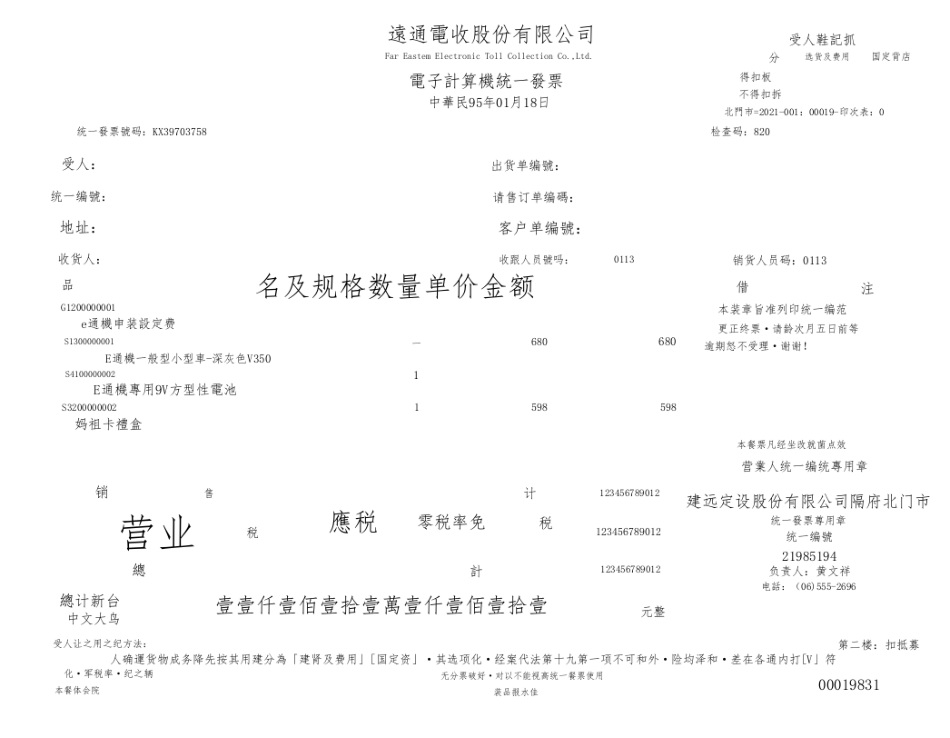

In [11]:
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont

# Create a white background image (adjust size as needed)
with Image.open(img_fp) as img:
    img_width, img_height = img.size

# Create a white background image with same dimensions as original
img = Image.new('RGB', (img_width, img_height), (255, 255, 255))
draw = ImageDraw.Draw(img)

# Load Chinese font
# you can download from https://huggingface.co/spaces/PaddlePaddle/PaddleOCR/blob/main/simfang.ttf
font_path = 'simfang.ttf'

for item in out:
    text = item['text']
    if not text:  # Skip empty text
        continue
        
    # Get the bounding box coordinates
    box = item['position']
    x_min, y_min = box[0][0], box[0][1]
    x_max, y_max = box[2][0], box[2][1]
    
    # Calculate text width and height
    text_width = x_max - x_min
    text_height = y_max - y_min
    
    # Calculate font size based on text height
    font_size = int((text_height + text_width/len(text))*0.35)  # Adjust factor as needed

    if font_size < 10:
        font_size = 10  # Minimum font size
    if font_size > 200:
        font_size = 200
    try:
        font = ImageFont.truetype(font_path, font_size)
    except:
        font = ImageFont.load_default()
    
    # Calculate text position (centered in the box)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_w = text_bbox[2] - text_bbox[0]
    text_h = text_bbox[3] - text_bbox[1]
    
    # Calculate position to center text in the box
    x_pos = x_min + (text_width - text_w) // 2
    y_pos = y_min + (text_height - text_h) // 2
    
    # Draw the text
    draw.text((x_pos, y_pos), text, font=font, fill=(0, 0, 0))

# Save or show the image
img.save('output_text.png')
img_array = np.array(img)

# Display image
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.imshow(img_array)
plt.axis('off')
plt.show()